In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd

# Load your dataset
df_alz = pd.read_csv("alzheimers_disease_data.csv")

# Drop the 'DoctorIncharge' column
df_alz = df_alz.drop(["DoctorInCharge", "PatientID"], axis=1)  # Pass column names as a list

# Verify the column has been removed
df_alz.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

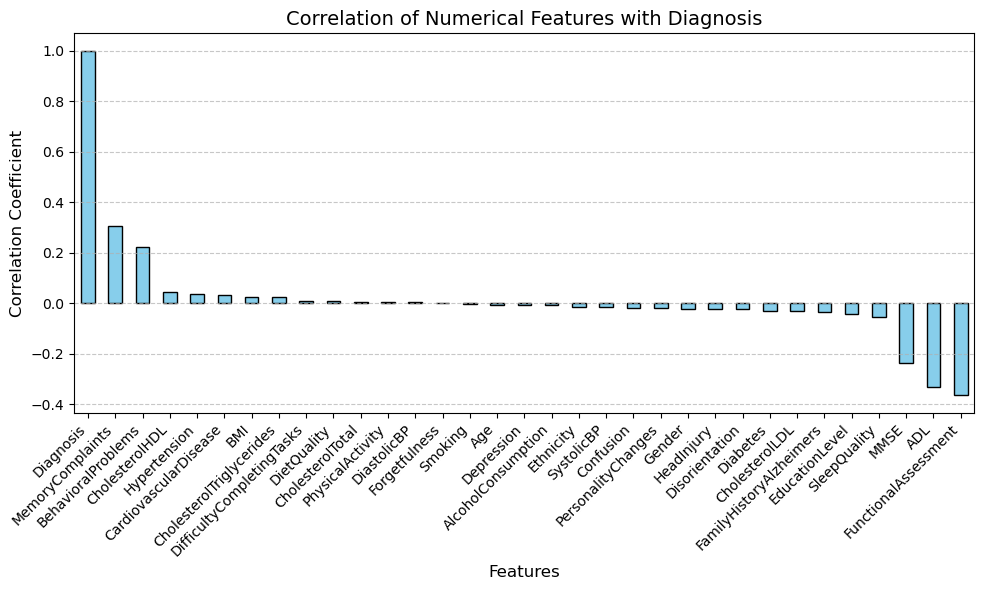

In [2]:
#Correlation (For Numerical Features)
#For numerical features and a categorical label (like diagnosis),
#calculate the correlation or use statistical tests like ANOVA.

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_alz is your DataFrame and 'diagnosis' is your label
numerical_features = df_alz.select_dtypes(include=["float64", "int64"]).columns
correlation = df_alz[numerical_features].corrwith(df_alz["Diagnosis"])

# Sort correlations
correlation_sorted = correlation.sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
correlation_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Correlation of Numerical Features with Diagnosis', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [3]:
#Extract the selected features from dataset
selected_features = [
    'MMSE', 'FunctionalAssessment', 'ADL',
    'MemoryComplaints', 'BehavioralProblems'
]

In [4]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define features and target
X = df_alz[selected_features]
y = df_alz['Diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Assuming 'y' is the target variable
#X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42) #Use 0.2 as test because accuracy is higher
model = xgb.XGBClassifier(random_state=42, use_label_encoder=False)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Accuracy: Proportion of correctly classified instances.
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
#From 0.94 decreased to 0.92 (SMOTE)

Accuracy: 0.9441860465116279


W:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:02:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [5]:
from sklearn.cluster import KMeans
import pickle

# Normalize the selected features for clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Extract and scale the data
X_clustering = scaler.fit_transform(df_alz[selected_features])

# Train the KMeans model
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X_clustering)

# Save the KMeans model to a file
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans_model, f)

print("KMeans model trained and saved as kmeans_model.pkl.")


KMeans model trained and saved as kmeans_model.pkl.


In [6]:
# Assuming '1' represents Alzheimer and '0' represents Non-Alzheimer in the 'Diagnosis' column
alz_predictions = X_test[y_pred == 1]  # Filter for instances where the prediction is Alzheimer
alz_true_labels = y_test[y_pred == 1]  # Corresponding true labels for Alzheimer predictions

# Print or return the filtered instances of Alzheimer's cases
print("Predicted Alzheimer cases:")
print(alz_predictions)


Predicted Alzheimer cases:
           MMSE  FunctionalAssessment       ADL  MemoryComplaints  \
451   13.957099              1.273793  2.014531                 0   
1656  16.924275              0.980757  5.116213                 1   
1070  23.909209              3.610240  1.483020                 0   
830   10.716269              1.310870  4.240209                 1   
1449  19.418633              1.906224  5.069047                 1   
...         ...                   ...       ...               ...   
439   23.415641              8.418075  3.048575                 0   
394    7.190098              2.994733  4.970869                 0   
1801  13.742970              2.131127  1.399639                 1   
671    1.430416              3.853381  0.718741                 0   
108   12.765209              3.229810  0.211953                 0   

      BehavioralProblems  
451                    0  
1656                   0  
1070                   0  
830                    1  
1449     

In [7]:
#Precision: Proportion of positive predictions that are actually correct.
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")
#From 0.9266 decreased to 0.869

Precision: 0.9266666666666666


In [8]:
#F1-Score: Harmonic mean of Precision and Recall. It's useful when you need a balance between Precision and Recall.
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1}")
#From 0.92 decreased to 0.894

F1-Score: 0.9205298013245033


ROC AUC: 0.9481493752366527


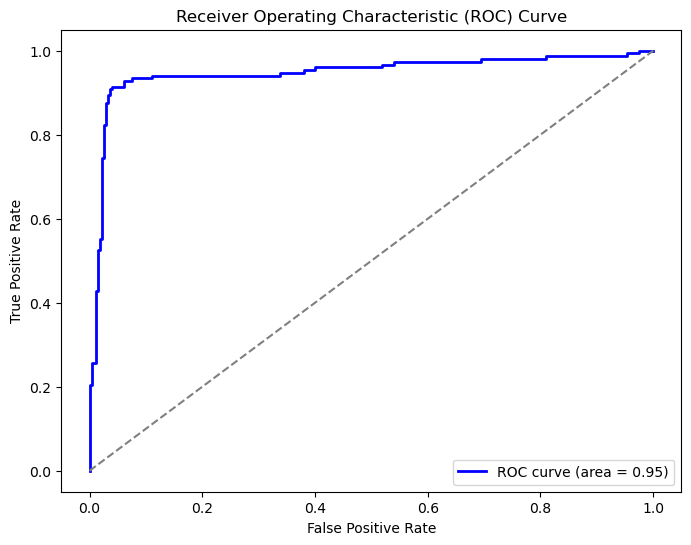

In [9]:
#ROC Curve and AUC (Area Under the Curve): Measures the performance of a binary classification model at all classification thresholds.
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc}")

#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
#Area 0.948 decreased to 0.937

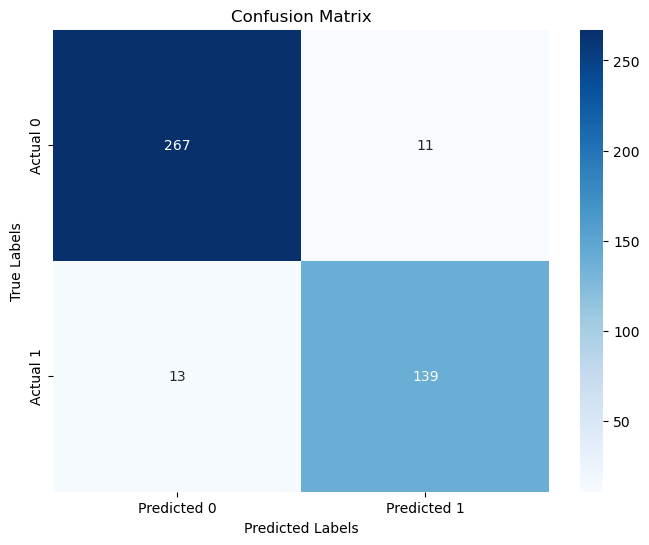

<Figure size 640x480 with 0 Axes>

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')  # Adjust filename and DPI as needed

In [11]:
#2. Extract the leaf node indices for each sample in the dataset XGBoost method

# Step 1: Extract the leaf node indices for all samples in the training set
leaf_indices = model.apply(X_train)

# Step 2: Filter the dataset for samples with Alzheimer's (label '1')
alzheimers_indices = np.where(y_train == 1)[0]  # Get indices of samples with Alzheimer's (label 1)

# Step 3: Extract the leaf node indices for only Alzheimer's samples
leaf_indices_alzheimers = leaf_indices[alzheimers_indices]

# Step 4: Print the leaf node indices for the first 5 Alzheimer's samples
print("Leaf node indices for the first 5 Alzheimer's samples:")
print(leaf_indices_alzheimers[:5])

Leaf node indices for the first 5 Alzheimer's samples:
[[ 7.  7. 16. 56. 54. 54. 61. 56. 52. 46. 38. 59. 43. 26. 39. 39. 37. 26.
  33. 34. 40. 30. 27. 38. 36. 37. 31. 36. 32. 32. 24. 27. 22. 43. 25. 40.
  21. 30. 31. 38. 27. 22. 40. 37. 46. 39. 27. 40. 13. 32. 32. 32. 32. 20.
  44. 31. 42. 27. 28. 17. 35. 32. 27. 34. 30. 42. 14. 27.  4. 27. 33. 36.
  23. 28. 28. 27. 24. 32. 25. 20. 24. 36. 17. 22. 28. 34. 35. 35. 35. 28.
  25. 24. 30. 30. 25. 33. 34. 21. 26. 21.]
 [19. 16. 33. 61. 60. 60. 67. 61. 35. 22. 35. 42. 44. 16. 40. 22. 33. 15.
  34. 27. 40. 51. 16.  8. 38. 37.  3. 41. 31. 37. 16. 27. 22. 11. 25. 40.
  25. 30. 38. 38. 34. 22. 11. 35. 18. 14. 30. 13. 13. 31. 19. 21. 32. 15.
  47. 33. 42. 28. 30. 27. 33. 32. 34. 32. 27. 43. 44. 21.  4. 28. 33. 23.
  24. 23. 27. 29. 25. 32.  5. 20. 23. 33. 15. 22. 11. 17. 35. 33. 41. 19.
  25. 24. 21. 25. 25. 27. 21.  9. 26. 16.]
 [ 7.  7. 16. 15. 15. 15. 60. 54. 52. 46. 38. 52. 40. 26. 39. 39. 37. 26.
  44. 34. 40. 50. 27. 37. 36. 37. 30. 36. 31.

In [12]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Step 4: Flatten the leaf indices for Alzheimer's samples (shape: (n_samples * n_trees, 1))
leaf_indices_flattened = leaf_indices_alzheimers.reshape(-1, 1)

# Step 5: One-hot encode the leaf indices
encoder = OneHotEncoder(sparse_output=False)
leaf_indices_encoded = encoder.fit_transform(leaf_indices_flattened)

# Step 6: Reshape the one-hot encoded array to match the number of Alzheimer's samples
n_samples_alzheimers = leaf_indices_alzheimers.shape[0]
n_trees = leaf_indices_alzheimers.shape[1]

# Reshape the one-hot encoded array to match (n_samples_alzheimers, n_trees * n_leaf_categories)
leaf_indices_encoded_reshaped = leaf_indices_encoded.reshape(n_samples_alzheimers, -1)

# Step 7: Ensure you're indexing X_train properly. If X_train is a NumPy array:
X_train_alzheimers = X_train.iloc[alzheimers_indices]  # For Pandas DataFrame, use .iloc to index by row

# Step 8: Concatenate the original features of Alzheimer's samples with the one-hot encoded leaf indices
X_encoded = np.hstack([X_train_alzheimers, leaf_indices_encoded_reshaped])

# Step 9: Print the shape of the encoded dataset
print("Shape of the encoded dataset:", X_encoded.shape)

Shape of the encoded dataset: (608, 8305)


In [13]:
from sklearn.decomposition import PCA
import numpy as np

# Step 1: Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # You can adjust n_components depending on how much variance you want to preserve

# Perform PCA only on the leaf indices (not the entire feature set)
leaf_indices_pca = pca.fit_transform(leaf_indices_encoded_reshaped)

# Print the shape of the PCA-reduced leaf indices
print("Shape of the PCA-reduced leaf indices:", leaf_indices_pca.shape)

# Step 2: Concatenate the original features (only Alzheimer's samples) with the PCA-reduced leaf indices
# Make sure you're using the Alzheimer's samples from X_train, not the full X_train dataset
# Ensure that you are using iloc for row indexing in a DataFrame
X_train_alzheimers = X_train.iloc[alzheimers_indices]  # Use .iloc[] to index by row for a DataFrame

# Concatenate the features and PCA-reduced leaf indices
X_encoded_reduced = np.hstack([X_train_alzheimers, leaf_indices_pca])

# Print the shape of the encoded and reduced dataset
print("Shape of the encoded and reduced dataset:", X_encoded_reduced.shape)


Shape of the PCA-reduced leaf indices: (608, 2)
Shape of the encoded and reduced dataset: (608, 7)


In [14]:
import joblib

# Assuming '' is your fitted KMeans model
joblib.dump(model, 'xgboost_model.pkl')


['xgboost_model.pkl']

Silhouette Score for KMeans clustering: 0.21008925686105112
